In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.shape[0])
print(df.isna().sum())

299
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<Axes: xlabel='DEATH_EVENT'>

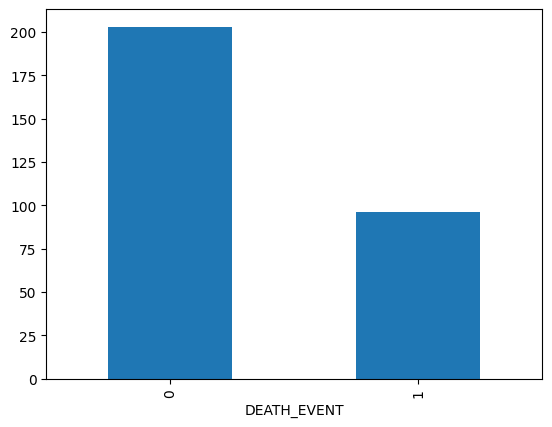

In [23]:
df['DEATH_EVENT'].value_counts().plot.bar()

<Axes: xlabel='age'>

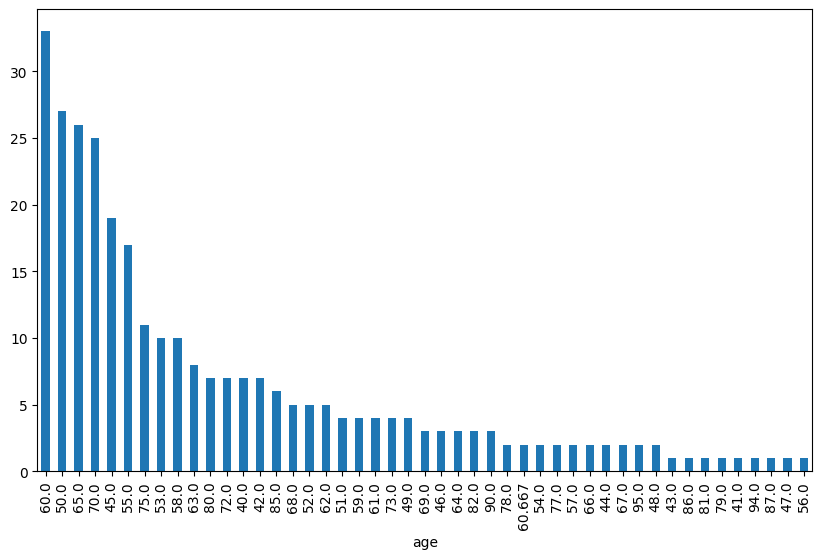

In [24]:
plt.figure(figsize=(10,6))
df['age'].value_counts().plot.bar()


<Axes: xlabel='sex'>

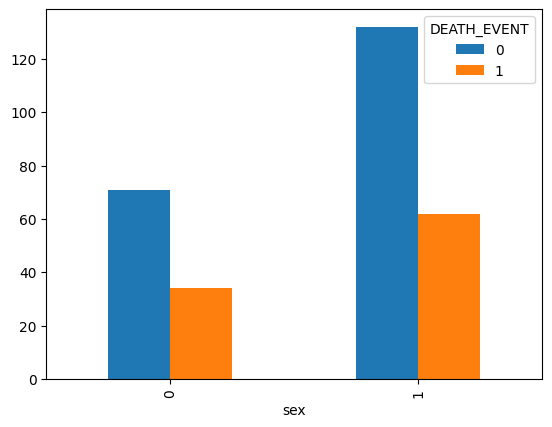

In [25]:
df.groupby(['sex','DEATH_EVENT']).size().unstack().plot.bar()

In [26]:
df_bin = df.copy()
df_bin['age'] = pd.cut(x=df_bin['age'], bins=5)
df_bin.pivot_table(index='age', columns=['smoking','sex'])['DEATH_EVENT']

smoking                0              1          
sex                    0         1    0         1
age                                              
(39.945, 51.0]  0.258065  0.346154  1.0  0.100000
(51.0, 62.0]    0.333333  0.218750  1.0  0.250000
(62.0, 73.0]    0.250000  0.260870  0.5  0.357143
(73.0, 84.0]    0.750000  0.571429  NaN  0.444444
(84.0, 95.0]    0.500000  0.714286  NaN  1.000000

In [27]:
df_anem = df[df['anaemia'] == 1]
df_anem['diabetes'].value_counts()

diabetes
0    76
1    53
Name: count, dtype: int64

<Axes: xlabel='age'>

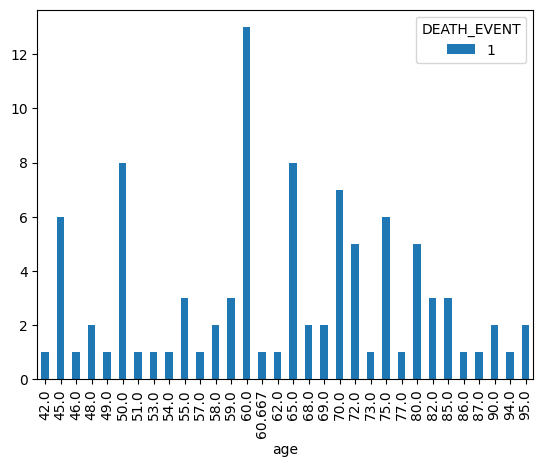

In [28]:
df_death = df[df['DEATH_EVENT'] == 1]
df_death.groupby(['age','DEATH_EVENT']).size().unstack().plot.bar()

<Axes: >

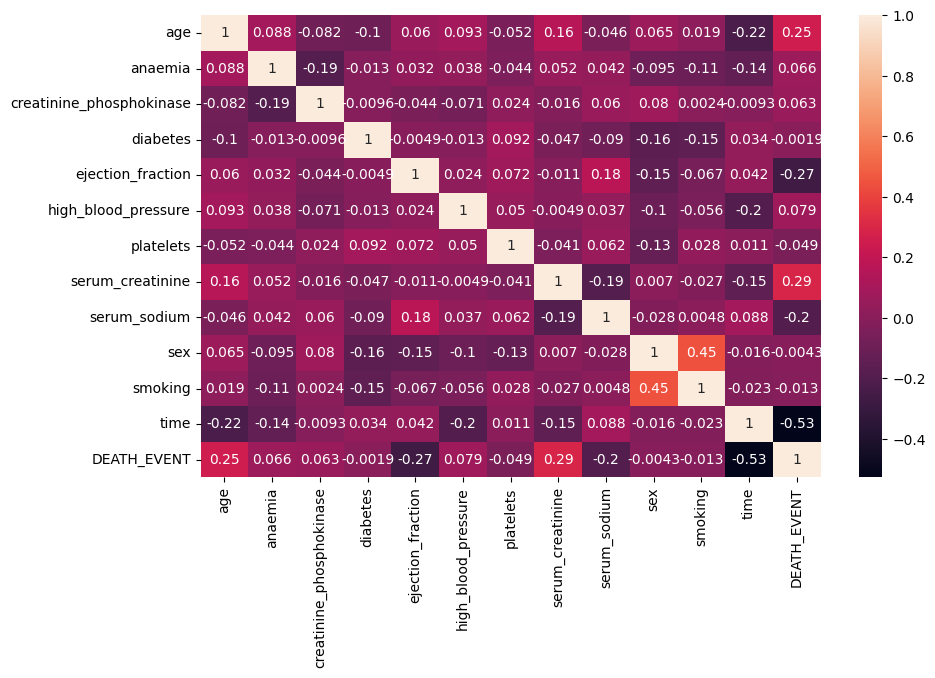

In [31]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)


In [32]:
df = df.drop(['time','serum_sodium','ejection_fraction'], axis=1)

Predizione decision tree Test: 0.62 Train: 1.0


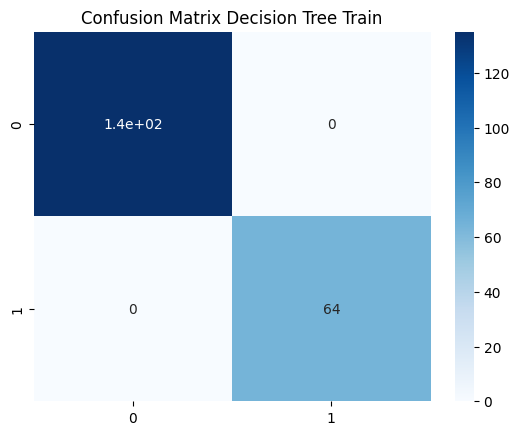

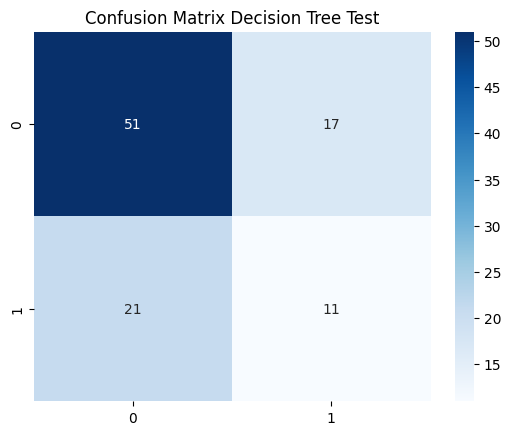

Predizione decision logistic Test: 0.69 Train: 0.6683417085427136


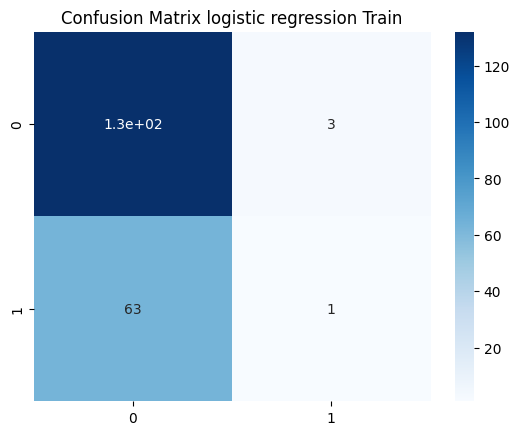

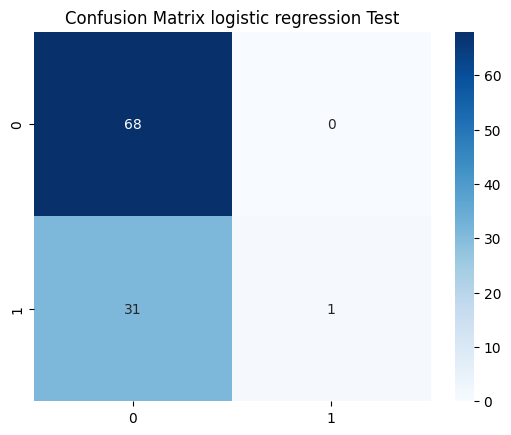

Predizione decision dummy Test: 0.68 Train: 0.678391959798995


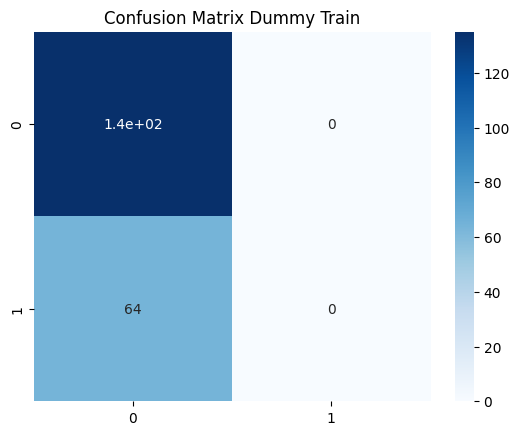

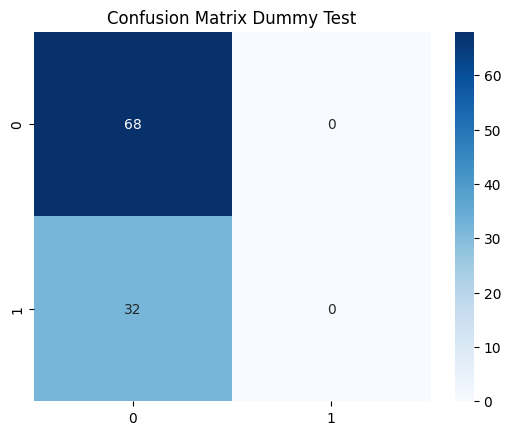

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
warnings.filterwarnings('ignore')

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)


tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Test')
plt.show()

logre = LogisticRegression()

logre.fit(X_train, y_train)

test_pred1 = logre.predict(X_test)
train_pred1 = logre.predict(X_train)
print(f'Predizione decision logistic Test: {accuracy_score(y_test, test_pred1)} Train: {accuracy_score(y_train, train_pred1)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix logistic regression Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix logistic regression Test')
plt.show()

dummy = DummyClassifier()

dummy.fit(X_train, y_train)

test_pred2 = dummy.predict(X_test)
train_pred2 = dummy.predict(X_train)
print(f'Predizione decision dummy Test: {accuracy_score(y_test, test_pred2)} Train: {accuracy_score(y_train, train_pred2)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Test')
plt.show()

In [42]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=5, scoring='accuracy').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logre, X, y, cv=5, scoring='accuracy').mean())
print('Accuracy Dummy con Cross Val ',cross_val_score(dummy, X, y, cv=5, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.655593220338983
Accuracy Logistic Regression con Cross Val  0.6722598870056498
Accuracy Dummy con Cross Val  0.6789265536723164


In [48]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop('time', axis=1)

scaler = MaxAbsScaler()

temp = scaler.fit_transform(df)
df_scaler = pd.DataFrame(temp, columns=df.columns)

X = df_scaler.drop('DEATH_EVENT', axis=1)
y = df_scaler['DEATH_EVENT']



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)


lin = LinearRegression()

lin.fit(X_train, y_train)

test_pred = lin.predict(X_test)
train_pred = lin.predict(X_train)
print(f'Predizione decision logistic Test: {mean_absolute_error(y_test, test_pred)} Train: {mean_absolute_error(y_train, train_pred)}')

Predizione decision logistic Test: 0.3515172396335683 Train: 0.3458008527182148


In [58]:
from sklearn.feature_selection import SelectKBest

col = SelectKBest(k=5)
temp = col.fit_transform(X, y)
k_col = pd.DataFrame(temp, columns=col.get_feature_names_out())

X = k_col


print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=5, scoring='accuracy').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logre, X, y, cv=5, scoring='accuracy').mean())
print('Accuracy Dummy con Cross Val ',cross_val_score(dummy, X, y, cv=5, scoring='accuracy').mean())


Accuracy Decision Tree con Cross Val  0.6489265536723163
Accuracy Logistic Regression con Cross Val  0.705593220338983
Accuracy Dummy con Cross Val  0.6789265536723164


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler,KBinsDiscretizer, Normalizer

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop('time', axis=1)

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

prepo = Pipeline(steps=[('kbin', KBinsDiscretizer(n_bins=6), ['age','platelets']),
                        ('maxabs', MaxAbsScaler()),
                        ('norm', Normalizer())])

prepo.fit(X, y)

pipeline = Pipeline(steps=[('prepo', prepo),
                           ('model', DecisionTreeClassifier())])


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

pipeline.fit(X_train,y_train)
test_pred = pipeline.predict(X_test)

print('Accuracy tree test:' + accuracy_score(y_test, test_pred))


ValueError: too many values to unpack (expected 2)